#immigration case study


The Dataset is sourced from  United Nations, Department of Economics and Social Affairs, Population Divison(2015)

The data set contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

We will be focusing on the Canadian immigration data.


In [1]:
import numpy as np  
import pandas as pd

In [2]:
#data importing into a dataframe using excel
df_can = pd.read_excel('Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
df_can.sample(10)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
57,Immigrants,Foreigners,Equatorial Guinea,903,Africa,911,Middle Africa,902,Developing regions,0,...,2,3,4,5,1,5,4,4,4,11
55,Immigrants,Foreigners,Egypt,903,Africa,912,Northern Africa,902,Developing regions,612,...,2393,2496,2190,2356,3347,3496,5982,4663,5555,4165
95,Immigrants,Foreigners,Latvia,908,Europe,924,Northern Europe,901,Developed regions,0,...,94,77,69,88,67,85,70,103,202,213
162,Immigrants,Foreigners,Sri Lanka,935,Asia,5501,Southern Asia,902,Developing regions,185,...,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394
157,Immigrants,Foreigners,Slovakia,908,Europe,923,Eastern Europe,901,Developed regions,0,...,597,369,241,215,125,128,135,134,136,105
180,Immigrants,Foreigners,Uganda,903,Africa,910,Eastern Africa,902,Developing regions,13,...,160,239,201,170,204,185,216,213,222,206
97,Immigrants,Foreigners,Lesotho,903,Africa,913,Southern Africa,902,Developing regions,1,...,2,4,0,4,1,8,7,1,0,6
105,Immigrants,Foreigners,Malaysia,935,Asia,920,South-Eastern Asia,902,Developing regions,786,...,401,593,580,600,658,640,802,409,358,204
49,Immigrants,Foreigners,Democratic Republic of the Congo,903,Africa,911,Middle Africa,902,Developing regions,15,...,1465,1521,1623,1466,1397,1581,1239,1224,1714,2050


In [3]:
#checking the basic info from the database
df_can.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [4]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [5]:
#looking at the indexes
df_can.index

RangeIndex(start=0, stop=195, step=1)

In [6]:
#checking dimensions of the data
df_can.shape

(195, 43)

In [7]:
#dropping unnecessary cols
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace=True)

df_can.head(5)
df_can.shape

(195, 38)

In [8]:
#renaming cols for better understanding
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns
df_can

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,124,161,140,122,133,128,211,160,174,217
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,56,91,77,71,64,60,102,69,46,59


In [9]:
#adding a column of total that sums up by country over the entire time period between 1980 - 2013
df_can['Total'] = df_can.sum(numeric_only=True,axis = 1)
df_can.columns
#df_can.sample(10)

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013,     'Total'],
      dtype='object')

In [10]:
#checking nulls
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [11]:
#checking statistical summary
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [13]:

df_can['Country'].unique().size
#df_can['Country'].unique()


195

In [14]:
df_can.set_index('Country', inplace=True)
#df_can.index.name = None
df_can.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [15]:
#checking data from india
df_can.loc['India']
#df_can[df_can.index == 'India']

Continent                  Asia
Region            Southern Asia
DevName      Developing regions
1980                       8880
1981                       8670
1982                       8147
1983                       7338
1984                       5704
1985                       4211
1986                       7150
1987                      10189
1988                      11522
1989                      10343
1990                      12041
1991                      13734
1992                      13673
1993                      21496
1994                      18620
1995                      18489
1996                      23859
1997                      22268
1998                      17241
1999                      18974
2000                      28572
2001                      31223
2002                      31889
2003                      27155
2004                      28235
2005                      36210
2006                      33848
2007                      28742
2008    

In [16]:
df_can.columns = list(map(str, df_can.columns))
df_can.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [17]:
# having a years list available for each of use later
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [18]:
# filter data based on multiple conditions

df_can['1980'] > 100 
df_can[   df_can['1980'] > 100    ]
df_can[ ( df_can['Continent']=='Asia' ) & (df_can['Region']=='Southern Asia') ]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


#visualizing the data

In [19]:
#importing `matplotlib` and `matplotlib.pyplot`

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use(['ggplot']) 

In [20]:
ind = df_can.loc['India',years]
ind

1980     8880
1981     8670
1982     8147
1983     7338
1984     5704
1985     4211
1986     7150
1987    10189
1988    11522
1989    10343
1990    12041
1991    13734
1992    13673
1993    21496
1994    18620
1995    18489
1996    23859
1997    22268
1998    17241
1999    18974
2000    28572
2001    31223
2002    31889
2003    27155
2004    28235
2005    36210
2006    33848
2007    28742
2008    28261
2009    29456
2010    34235
2011    27509
2012    30933
2013    33087
Name: India, dtype: object

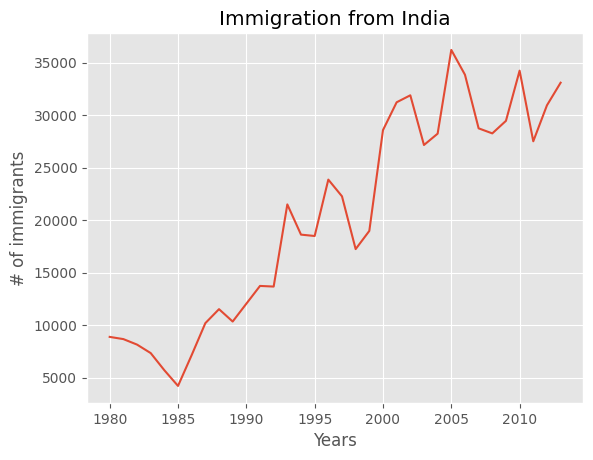

In [21]:
#immigration from india
ind.plot(kind='line')
plt.title('Immigration from India')
plt.ylabel('# of immigrants')
plt.xlabel('Years')

plt.show()

In [22]:
#comparing with china
df_CI = df_can.loc[['India', 'China'], years]
df_CI

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


In [23]:
# Transposing the data to make sure Index(i.e. x-axis has years) and Columns(i.e. country wise cnts on y-axis)
df_CI = df_CI.transpose() 
df_CI.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


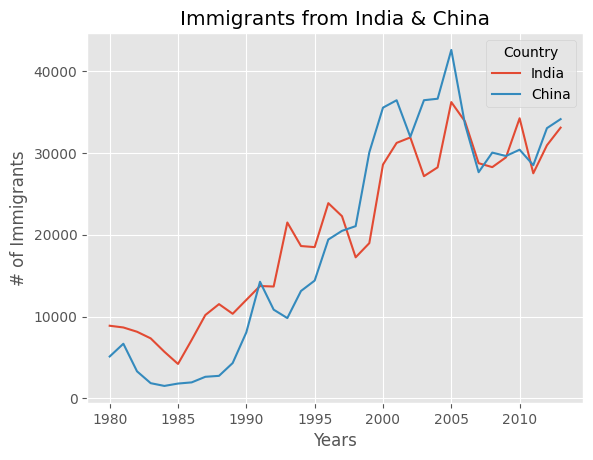

In [23]:
df_CI.plot(kind='line')

plt.title('Immigrants from India & China')
plt.ylabel('# of Immigrants')
plt.xlabel('Years')

plt.show()

In [24]:
#comparing top 3 countries that contributed the most to immigration to canada
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

df_can
# get the top 3 entries
df_top3 = df_can.head(3)
df_top3
# transpose the dataframe
df_top3 = df_top3[years].transpose() 
df_top3

Country,India,China,United Kingdom of Great Britain and Northern Ireland
1980,8880,5123,22045
1981,8670,6682,24796
1982,8147,3308,20620
1983,7338,1863,10015
1984,5704,1527,10170
1985,4211,1816,9564
1986,7150,1960,9470
1987,10189,2643,21337
1988,11522,2758,27359
1989,10343,4323,23795


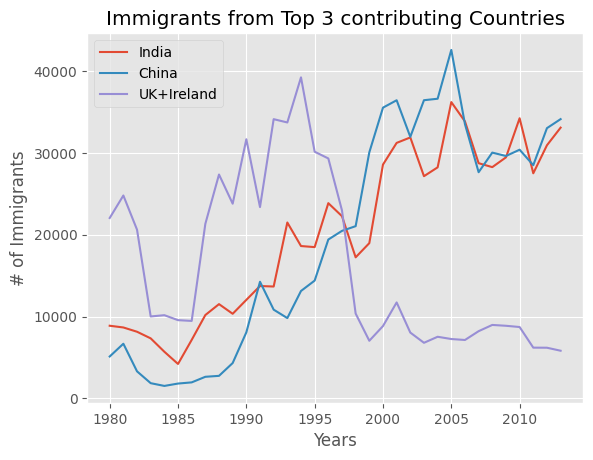

In [25]:
df_top3.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK+Ireland'},inplace=True)

df_top3.plot(kind='line')

plt.title('Immigrants from Top 3 contributing Countries')
plt.ylabel('# of Immigrants')
plt.xlabel('Years')
plt.legend(loc='upper left')
plt.show()

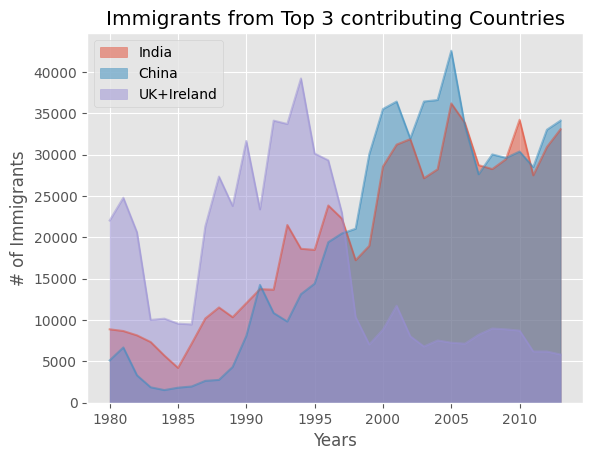

In [26]:
#comparing same with the area chart
df_top3.plot(kind='area',
             stacked=False)

plt.title('Immigrants from Top 3 contributing Countries')
plt.ylabel('# of Immigrants')
plt.xlabel('Years')
plt.legend(loc='upper left')
plt.show()


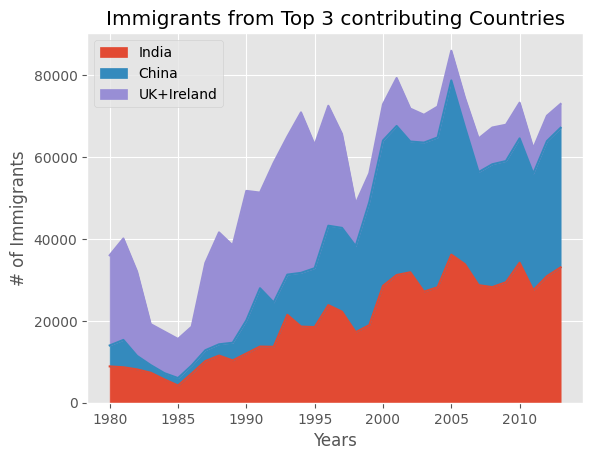

In [27]:
df_top3.plot(kind='area',
             stacked=True)

plt.title('Immigrants from Top 3 contributing Countries')
plt.ylabel('# of Immigrants')
plt.xlabel('Years')
plt.legend(loc='upper left')
plt.show()

In [28]:
# histogram of # of countries against # of Immigrants
df_can[(df_can['1980'] > 5000) & (df_can['1980'] < 10000)]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122


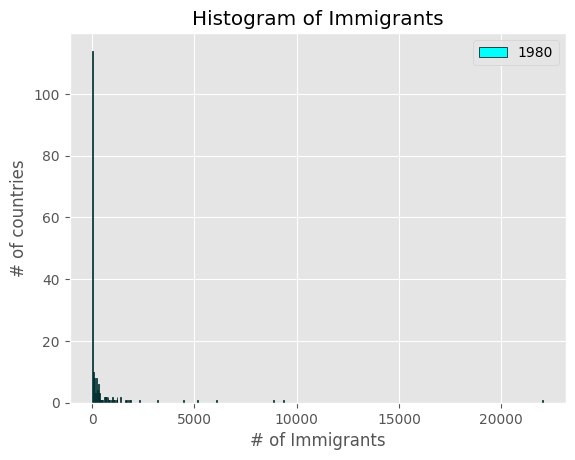

In [29]:

plt.hist(df_can['1980'], bins=500, color=['cyan'], edgecolor='black')
 
# Adding labels and title
plt.xlabel('# of Immigrants')
plt.ylabel('# of countries')
plt.title('Histogram of Immigrants')
plt.legend(['1980']) 
# Display the plot
plt.show()

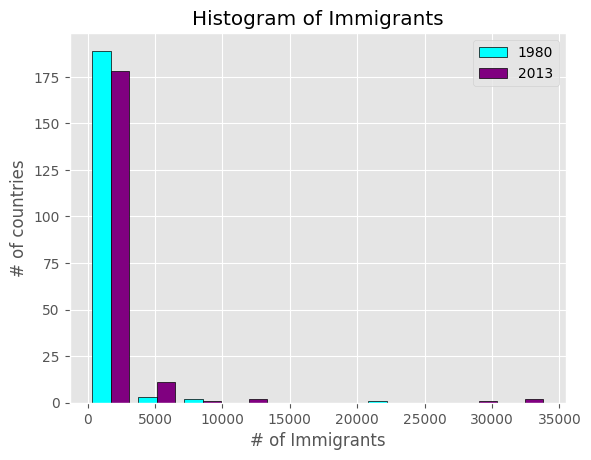

In [30]:

plt.hist(df_can[['1980','2013']], bins=10, color=['cyan', 'Purple'], edgecolor='black')
 
# Adding labels and title
plt.xlabel('# of Immigrants')
plt.ylabel('# of countries')
plt.title('Histogram of Immigrants')
plt.legend(['1980', '2013']) 
# Display the plot
plt.show()

In [31]:
df_can.loc['India',years]

1980     8880
1981     8670
1982     8147
1983     7338
1984     5704
1985     4211
1986     7150
1987    10189
1988    11522
1989    10343
1990    12041
1991    13734
1992    13673
1993    21496
1994    18620
1995    18489
1996    23859
1997    22268
1998    17241
1999    18974
2000    28572
2001    31223
2002    31889
2003    27155
2004    28235
2005    36210
2006    33848
2007    28742
2008    28261
2009    29456
2010    34235
2011    27509
2012    30933
2013    33087
Name: India, dtype: object

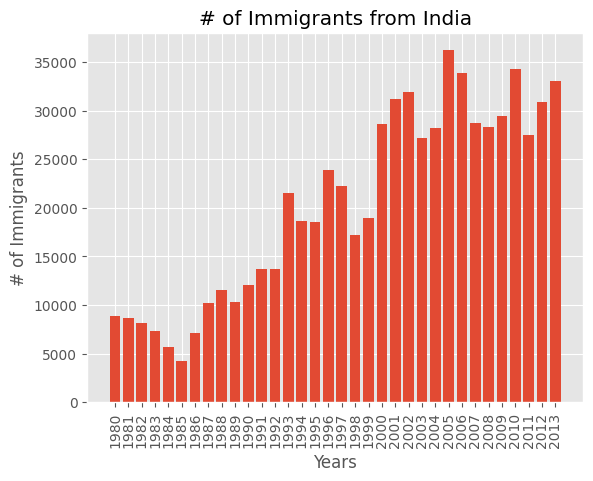

In [32]:
plt.bar(years, df_can.loc['India',years])
 
plt.xlabel("Years") 
plt.ylabel("# of Immigrants")   
plt.title("# of Immigrants from India")
plt.xticks(rotation=90)
plt.show()

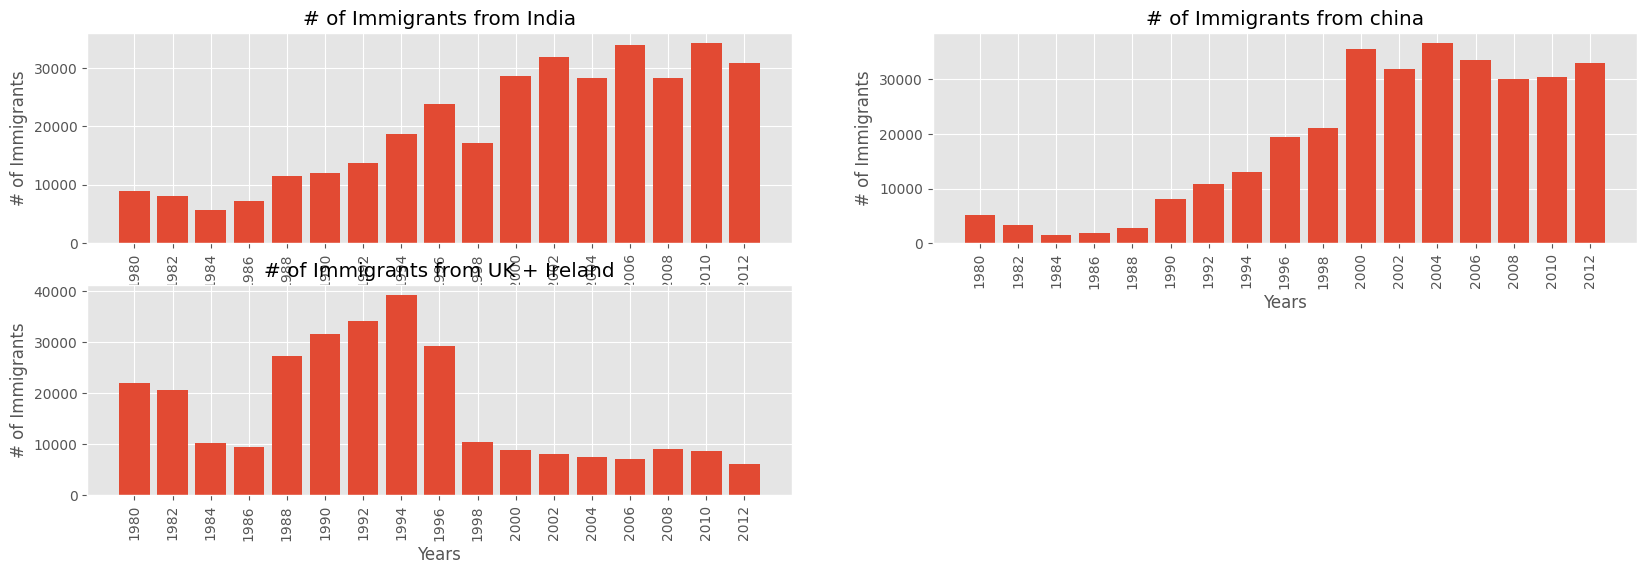

In [33]:
#multiple plots in an area
plt.figure(figsize=(20, 6))

plt.subplot(221)
plt.bar(years[::2], df_can.loc['India',years[::2]])
plt.title("# of Immigrants from India")
plt.xlabel("Years") 
plt.ylabel("# of Immigrants")
plt.xticks(rotation=90)

plt.subplot(222)
plt.bar(years[::2], df_can.loc['China',years[::2]])
plt.title("# of Immigrants from china")
plt.xlabel("Years") 
plt.ylabel("# of Immigrants") 
plt.xticks(rotation=90)
#plt.suptitle('India vs China')

plt.subplot(223)
plt.bar(years[::2], df_can.loc['United Kingdom of Great Britain and Northern Ireland',years[::2]])
plt.title("# of Immigrants from UK + Ireland")
plt.xlabel("Years") 
plt.ylabel("# of Immigrants") 
plt.xticks(rotation=90)

plt.show()
 
    


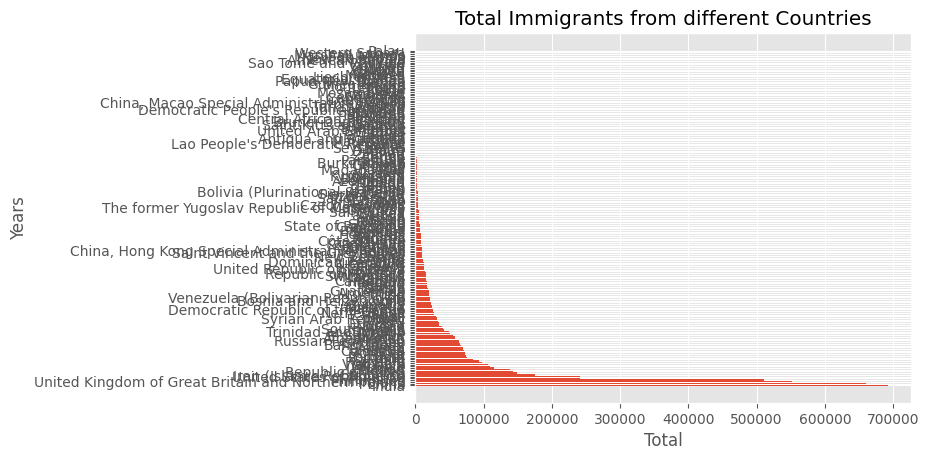

In [34]:
plt.barh(df_can.index,df_can['Total'])
 
plt.xlabel("Total") 
 
plt.ylabel("Years")   
plt.title("Total Immigrants from different Countries")
#plt.xticks(rotation=90)
plt.show()

In [35]:
df_can.index.values[1:10].tolist()

['China',
 'United Kingdom of Great Britain and Northern Ireland',
 'Philippines',
 'Pakistan',
 'United States of America',
 'Iran (Islamic Republic of)',
 'Sri Lanka',
 'Republic of Korea',
 'Poland']

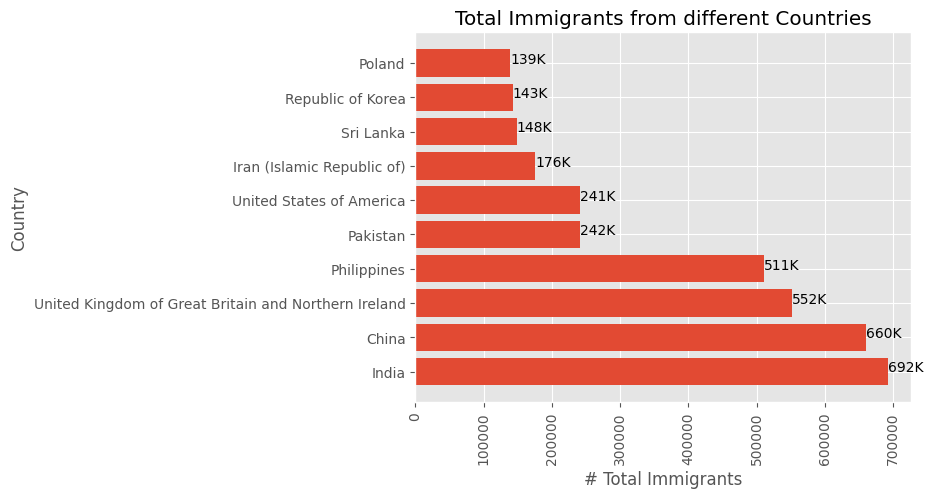

In [67]:
df_can.sort_values(by='Total', ascending=False, inplace=True)

plt.barh(df_can.index.values[0:10].tolist(),df_can['Total'][0:10])
 
plt.xlabel("# Total Immigrants") 
 
plt.ylabel("Country")   
plt.title("Total Immigrants from different Countries")
plt.xticks(rotation=90)

for index, value in enumerate(df_can['Total'][0:10]):
    plt.text(value, index,
             str(round(value/1000))+'K')
plt.show()

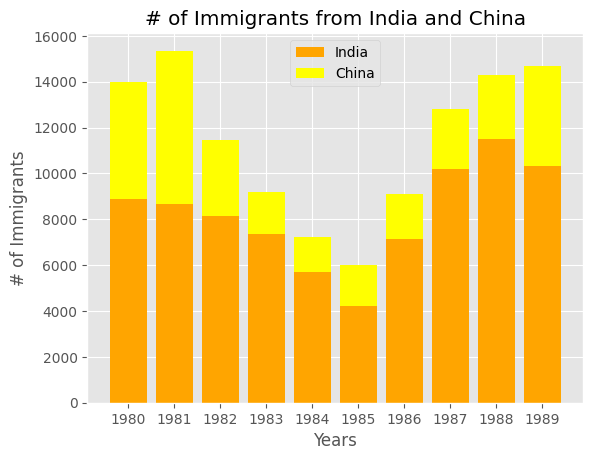

In [36]:
#stacked bar chart
plt.bar(years[0:10], df_can.loc['India',years[0:10]],color='orange')

plt.bar(years[0:10], df_can.loc['China',years[0:10]], bottom=df_can.loc['India',years[0:10]],color='yellow')
 
plt.xlabel("Years") 
 
plt.ylabel("# of Immigrants")   
plt.title("# of Immigrants from India and China")
plt.legend(["India", "China"])

#plt.xticks(rotation=90)
plt.show()

In [37]:
#using pie chart
df_grouped=df_can[['Continent','Total']].groupby('Continent').sum('Total')
df_grouped

,Total
Continent,
Africa,618948
Asia,3317794
Europe,1410947
Latin America and the Caribbean,765148
Northern America,241142
Oceania,55174


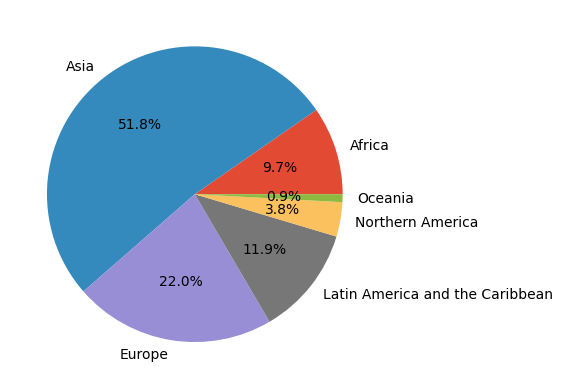

In [38]:
plt.pie(df_grouped['Total'], labels=df_grouped.index, autopct='%1.1f%%')
 
# show plot
plt.show()

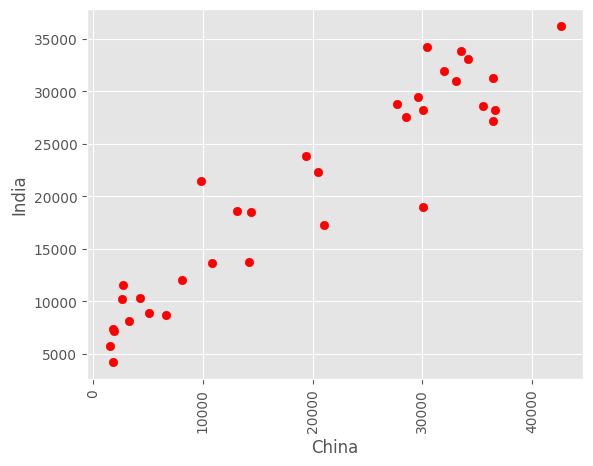

In [39]:
#using scatter plot
plt.scatter(df_can.loc['China',years], df_can.loc['India',years], c ="red")

plt.xlabel("China")
plt.ylabel("India")
plt.xticks(rotation=90)
plt.show()